In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
import ipywidgets as widgets
import scipy.interpolate

In [17]:
def f(t, a, b, c):
    return np.sqrt(a) * np.exp(-b * t) * np.sin(c * t) + 0.5 * np.cos(2 * t)

def plot_with_parameters(a, b, c):
    # Define time range
    t = np.linspace(0, 1, 100)

    # Calculate f(t) for these parameters
    f_values = f(t, a, b, c)

    # Plot the function
    plt.figure(figsize=(10, 6))
    plt.plot(t, f_values, label=r'$f(t; a, b, c)$', color='blue')
    plt.xlabel('Time $t$')
    plt.ylabel(r'$f(t)$')
    plt.title(r'Time Series $f(t; a, b, c)$')
    plt.legend()
    plt.grid(True)
    plt.savefig('time_series.png')
    plt.show()

def plot_against_interpolation(a, b, c, f_interpolated, t = np.linspace(0, 1, 100)):
    f_values = f(t, a, b, c)
    # Plot values and interpolated function
    plt.figure(figsize=(10, 6))
    plt.plot(t, f_values, label=r'$f(t; a, b, c)$', color='blue')
    plt.plot(t, f_interpolated(t), label='Interpolated', color='red', linestyle='dashed')
    plt.xlabel('Time $t$')
    plt.ylabel(r'$f(t)$')
    plt.title(r'Time Series $f(t; a, b, c)$')
    plt.legend()
    plt.grid(True)
    plt.show()


# Create interactive widget
interactive_plot = interactive(
    plot_with_parameters,
    a=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.1),
    b=widgets.FloatSlider(min=-0.5, max=0.5, step=0.01, value=-0.13),
    c=widgets.FloatSlider(min=5, max=10, step=0.1, value=9)
)

# Display the interactive plot
display(interactive_plot)



interactive(children=(FloatSlider(value=0.1, description='a', max=1.0, step=0.01), FloatSlider(value=-0.13, de…

## Question 1
Consider all parameter values (except t) are fixed and create an interpolator with respect to time (t). Use the original grid (100 t's between 0 and 1) for the interpolation.

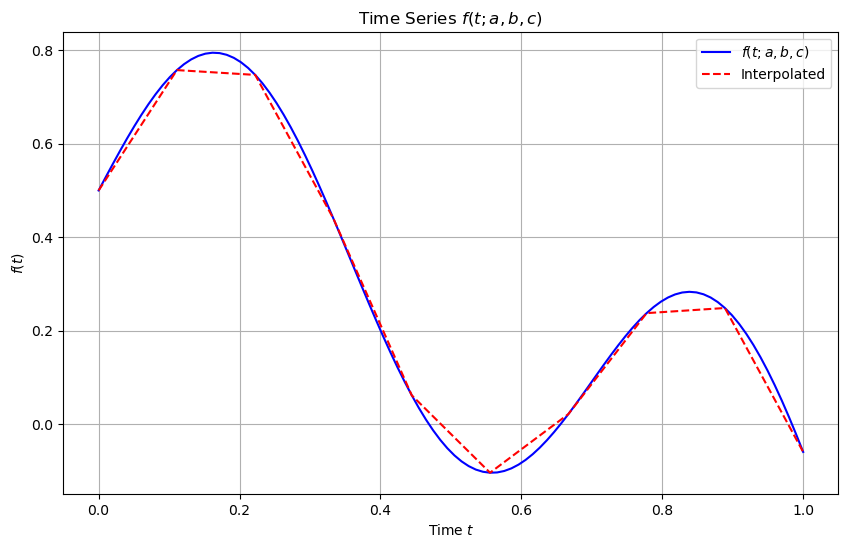

In [27]:
# We define the parameters as fixed values
a = 0.1
b = -0.13
c = 9

# We create an array of 100 t's between 0 and 1 (linear space)
t = np.linspace(0, 1, 10)

# We obtain the values of f(t) for the given parameters
f_values = f(t, a, b, c)

# We interpolate the values of f(t) using a linear interpolation
f_interpolated = scipy.interpolate.interp1d(t, f_values, kind='linear')

# We plot the values of f(t) and the interpolated function
plot_against_interpolation(a, b, c, f_interpolated, t=np.linspace(0, 1, 100))


### Conclusion
On an already fine grid, even with a linear interpolator, the function is already very well interpolated when examined visually.

## Question 2 and 3
2. Evaluate the interpolator on a much finer grid than the original t grid.
3. Show the results of question 2 in a plot, showing both the exact function and the predictions of the interpolator.

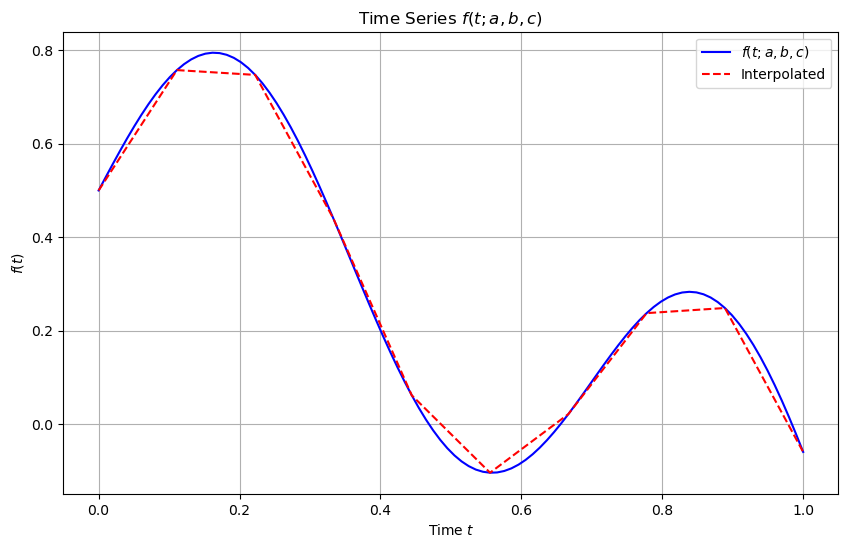

In [33]:

# We create an array of 100 t's between 0 and 1 (linear space)
t = np.linspace(0, 1, 10)

# We obtain the values of f(t) for the given parameters
f_values = f(t, a, b, c)

# We interpolate the values of f(t) using a linear interpolation
f_interpolated = scipy.interpolate.interp1d(t, f_values, kind='linear')

# We plot the values of f(t) and the interpolated function
plot_against_interpolation(a, b, c, f_interpolated)


## Question 4
Show the ratio of the interpolated values to true values accross the fine time grid.

What do you observe? Does it make sense?

In [35]:
# Count how many f_values there are
n_values = len(f_values)
# Get the interpolated values for the same t's (but if there are more f_values, I want the interpolated values for more t's)
t_interpolated = np.linspace(0, 1, n_values)
f_interpolated_values = f_interpolated(t_interpolated)
# Calculate the ratio between the interpolated values and the real values
ratio = f_interpolated_values / f_values
print(ratio)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


*Come back to this question!!!*

## Question 5
Consider now all paramaters fixed except a and t.

We assume the parameter a can take values between 0 and 1.

Generate 10 samples of f (i.e., 10 time series) corresponding to linearly spaced values of a spanning the interval.

Store them in a pandas DataFrame and plot them with the plot method of the DataFrame.